In [12]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True
sns.set(style='white', context='notebook', palette='deep')

from features import *

In [13]:
masterDataset = pd.read_csv('../input/train.csv')

produce_social_category(masterDataset)
produce_age_category(masterDataset)
produce_fare_category(masterDataset)
produce_is_child(masterDataset)
produce_family_size_and_is_alone(masterDataset)
produce_gender(masterDataset)
produce_embarked_location(masterDataset)

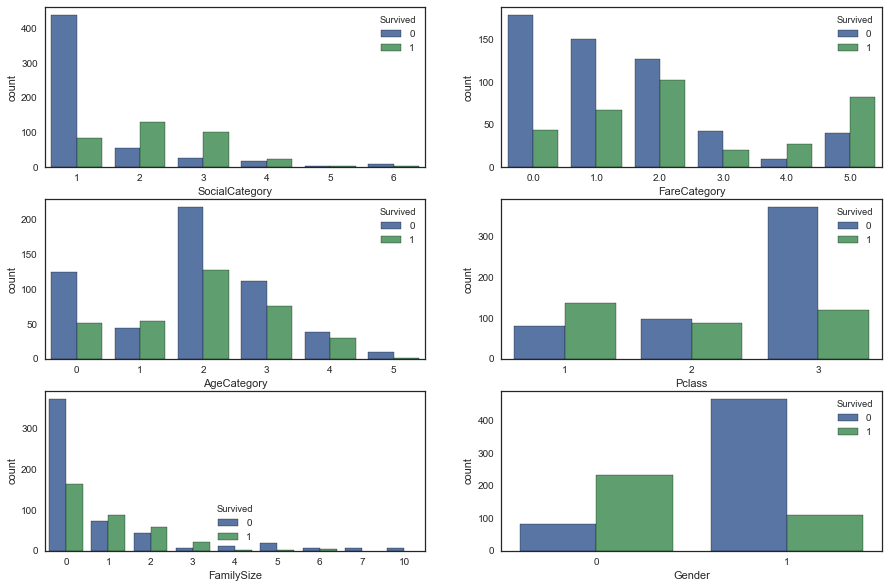

In [14]:
categorical_features = ['SocialCategory', 'FareCategory', 'AgeCategory', 'Pclass', 'FamilySize', 'Gender']
_, axs = plt.subplots(ncols= 2, nrows=3, figsize=(15,10))
feature = -1
for i in range(3):
    for j in range(2):
        feature = feature + 1
        if(feature < len(categorical_features)):
            sns.countplot(x=categorical_features[feature], data=masterDataset, hue='Survived', ax=axs[i, j])

First lets take a look what social categories we even have.
```python 
socialCategoriesFromTitle = {
    'Unknown' : 0,
    'Mr': 1,
    'Miss': 2,
    'Mrs': 3,
    'Master': 4,
    'Royalty': 5,
    'Officer': 6
}
```
* Seemingly, social categories Miss and Mrs have a good chance of surviving. More than 200 of them combined had survived.
* On the other hand, social categories Mr, Master and Royalty had no such luck. Most of them actually died.
* Thus, SocialCategory can be a powerful metric for our model.

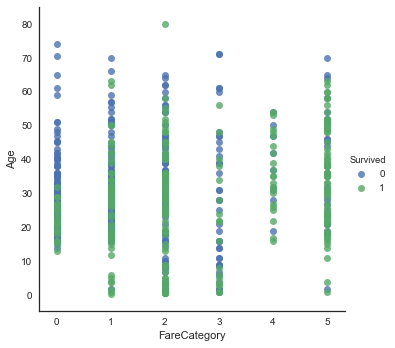

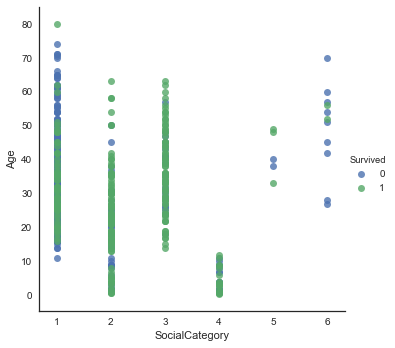

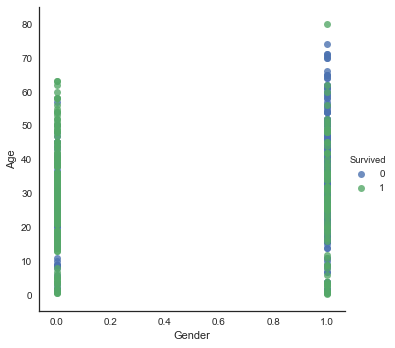

In [15]:
sns.lmplot(x="FareCategory", y="Age", hue="Survived", data=masterDataset, fit_reg=False, size=5)
sns.lmplot(x="SocialCategory", y="Age", hue="Survived", data=masterDataset, fit_reg=False, size=5)
sns.lmplot(x="Gender", y="Age", hue="Survived", data=masterDataset, fit_reg=False, size=5)

 * We have already noticed that being a female was a better option, but there is a misterious around 10 years of age that did not survive. Being a younger male adult lead to a good chance of surviving, while senior male adults generally had a bad survival outcome.

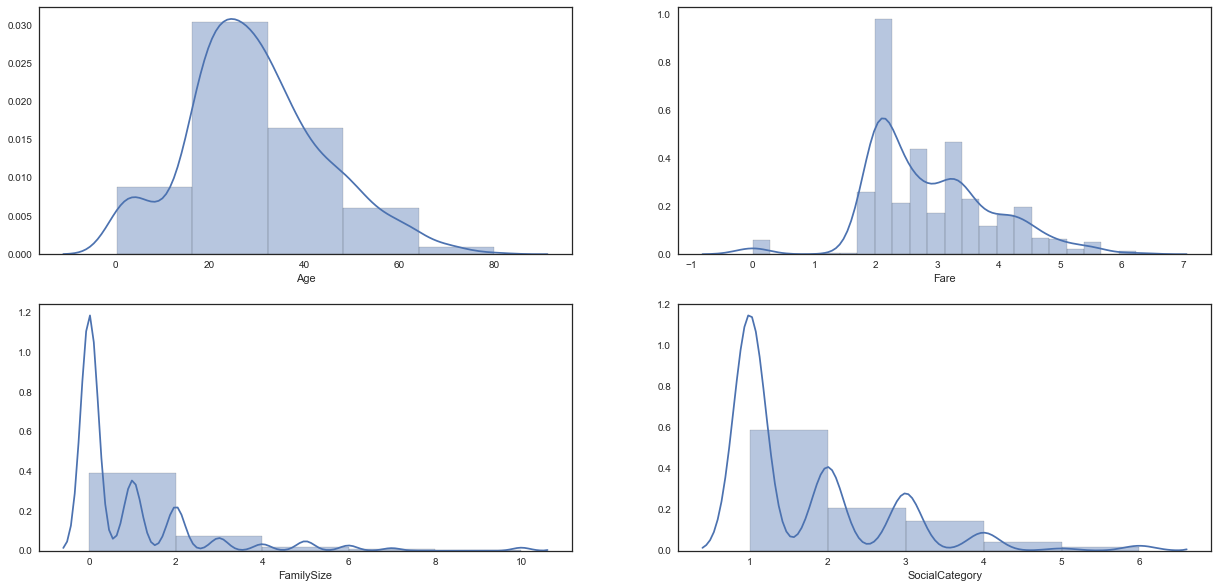

In [18]:
fig, axes = plt.subplots(2,2)
fig.set_size_inches(21,10)
sns.distplot(masterDataset.Age.dropna(), bins=5, ax= axes[0,0])
sns.distplot(masterDataset.Fare.dropna(), label="Skewness : %.2f"%(masterDataset.Fare.skew()), ax= axes[0,1])
sns.distplot(masterDataset.FamilySize.dropna(), bins=5, ax= axes[1,0])
sns.distplot(masterDataset.SocialCategory.dropna(), bins=5, ax= axes[1,1])
plt.show()

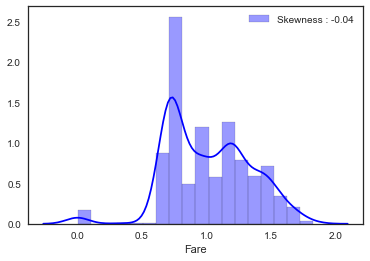

In [19]:
masterDataset["Fare"] = masterDataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
g = sns.distplot(masterDataset["Fare"], color="b", label="Skewness : %.2f"%(masterDataset["Fare"].skew()))
g = g.legend(loc="best")
